# Workshop 6: Data Visualisation with Looker Studio

Requirement ทางธุรกิจ:
* ทีม Product และทีม Marketing ต้องการขยาย
ตลาดมาประเทศไทย จึงอยากรู้ว่าสินค้าไหนที่
ขายดีเพื่อจะได้หาสินค้าที่ถูกใจผู้บริโภคมาวางขาย
และวางแผนจัดโปรโมชั่นได้เหมาะสม

 * ทีม Marketing อยากรู้ยอดขาย และจำนวนลูกค้าในแต่ละประเทศ
 * ทีม Marketing อยากรู้ว่าหนังสือเล่มไหนขายดีเพื่อจะได้เลือกมาโปรโมทได้
  * ทีม Product อยากรู้ว่าหนังสือหมวดหมู่ไหนขายดีเพื่อจะได้ตามหาหนังสือด้านนั้นมาขายมากขึ้น
 * ทีม Marketing อยากได้ระบบค้นหาหนังสือตามยอดขาย ตามประเทศ เพื่อช่วยให้วางแผน Marketing ได้ง่ายขึ้น

Requirement ทาง Tech:
* บริษัทเก็บข้อมูลยอดขายจากบนเว็บไซต์ไว้ใน
Database
* ต้องการให้ทีม Data Engineer เตรียมข้อมูลให้
Data Analyst ออฟฟิศไทย เอาข้อมูลนี้มาทำ
Report และ Dashboard เสนอทีม Product และ
Marketing

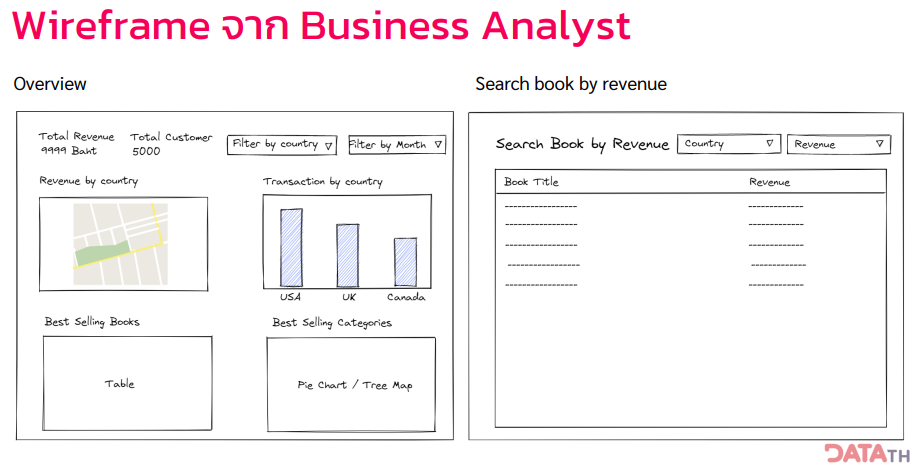

## ข้อมูลเก็บอยู่ใน BigQuery

### Table

* ใช้ข้อมูล table ชื่อว่า ws6 (เป็นตารางที่เก็บข้อมูล transaction) ในการทำ Report และ Dashboard

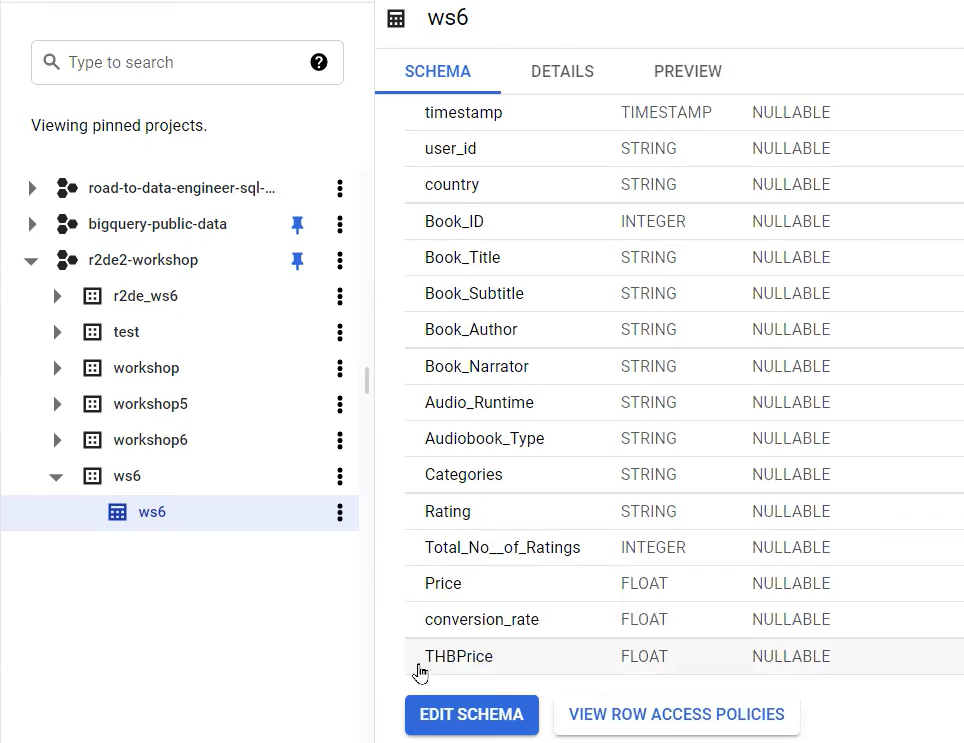

### View

* สร้ำง View ขึ้นมา เพื่อนำข้อมูลบางส่วนไปใช้ทำ Dashboard เพื่อให้ Data Analyst เห็นเฉพาะข้อมูลที่จะใช้


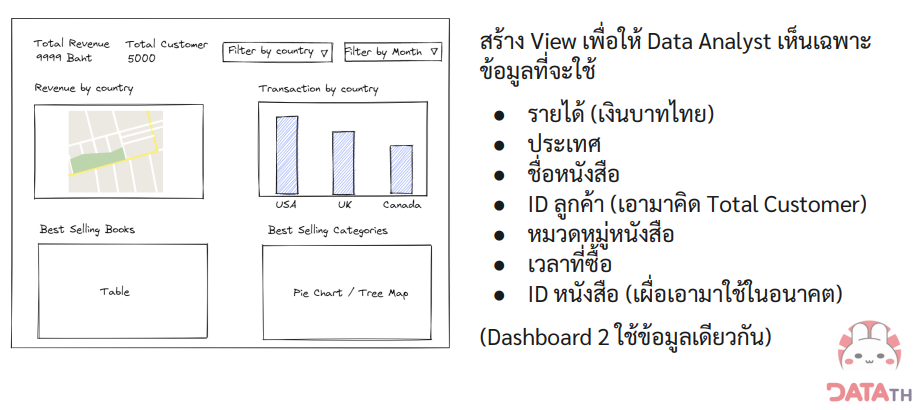

* sql ที่ใช้ในการสร้าง view
 * รายได้ = THBPrice
 * ประเทศ = country
 * ชื่อหนังสือ = Book_Title
 * ID ลูกค้า = user_id
 * หมวดหมู่หนังสือ = Categories
 * เวลาที่ซื้อ = timestamp
 * ID หนังสือ = Book_ID

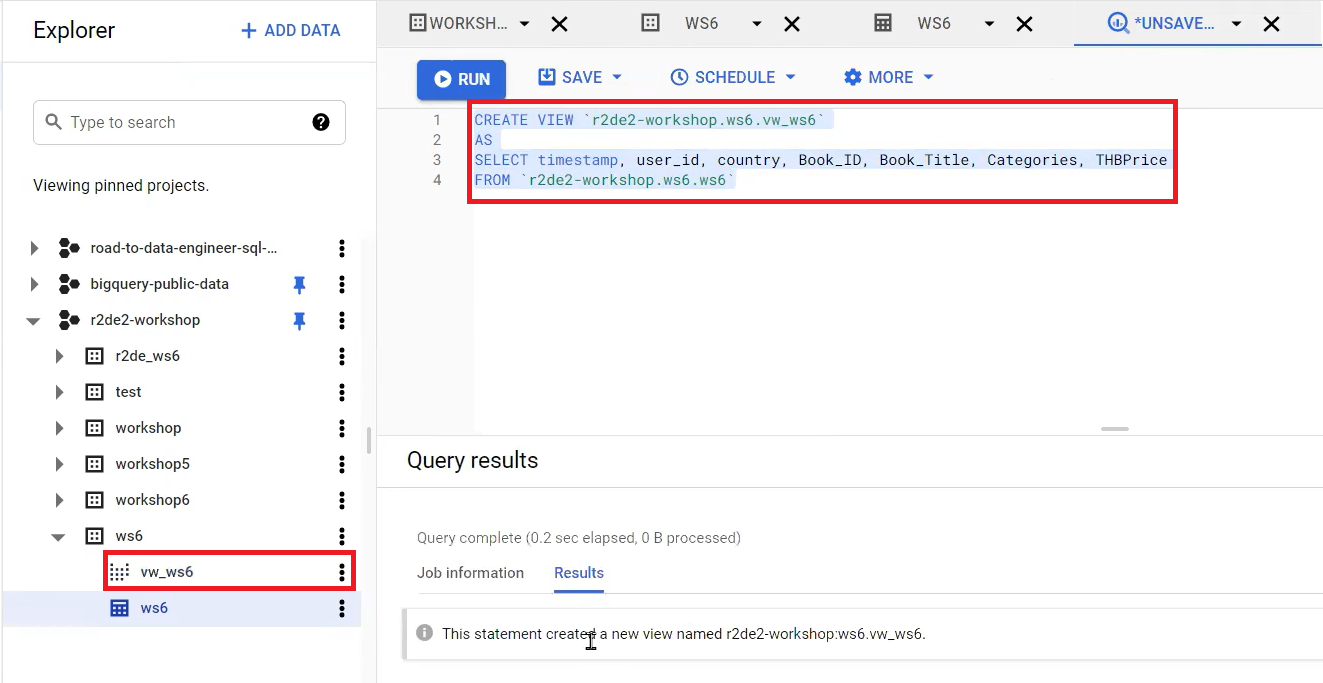

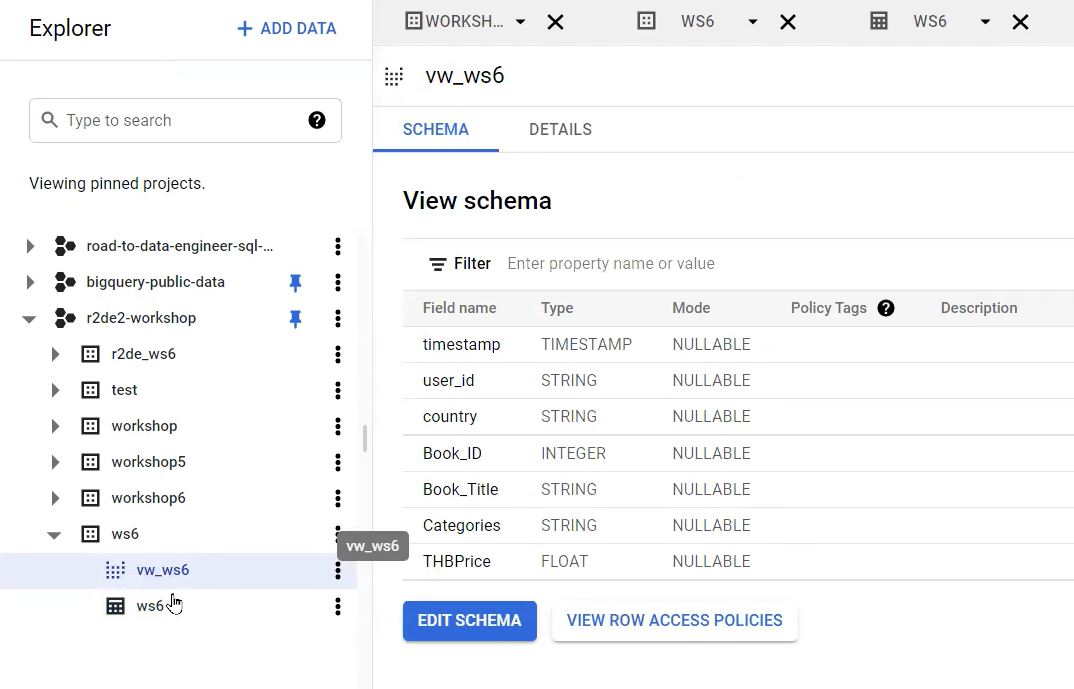

## ข้อมูลที่อยู่ใน Looker Studio

* สร้าง Dashboard เข้าที่ https://lookerstudio.google.com/

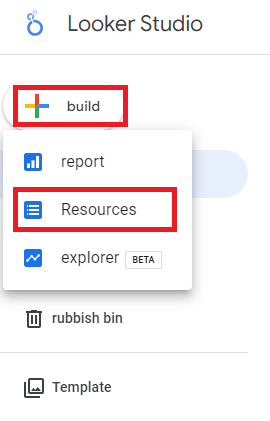

* เลือก BigQuery

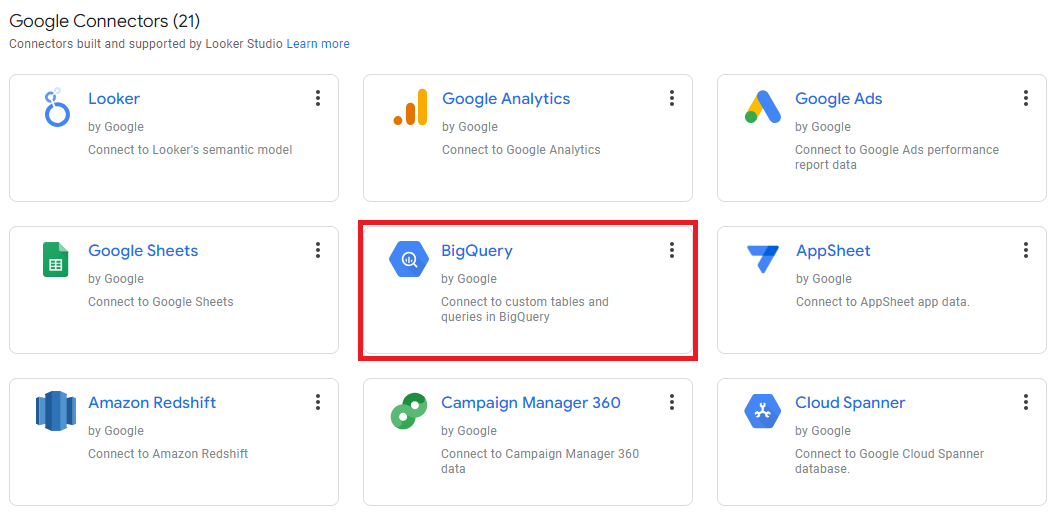

* เลือก project > dataset > table และกด connect

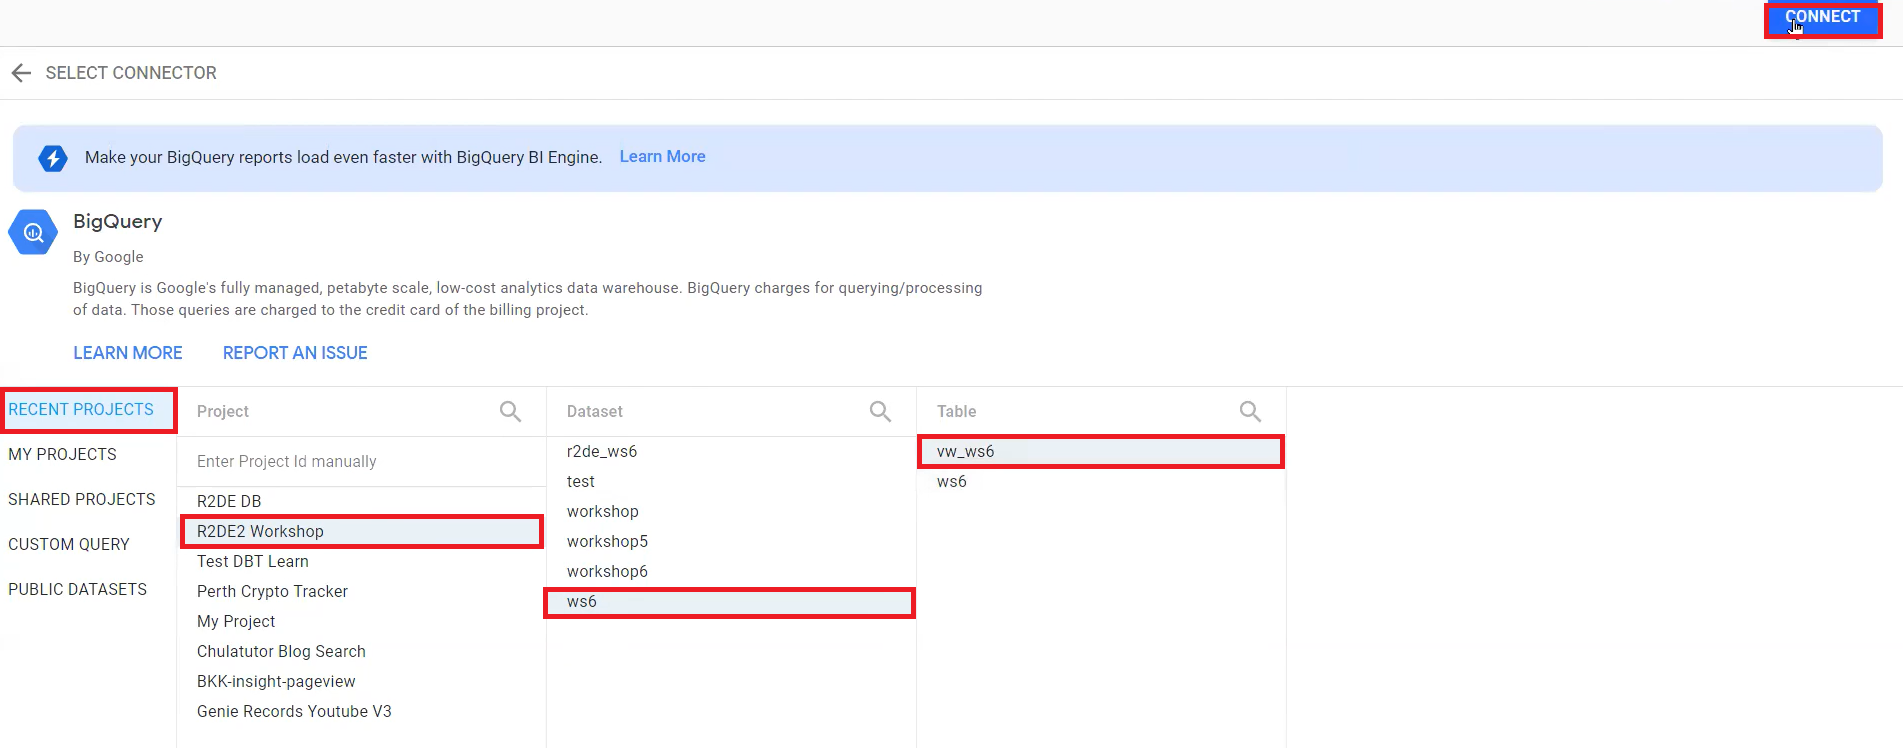

* ได้ข้อมูลจาก BigQuery และกด CREATE REPORT

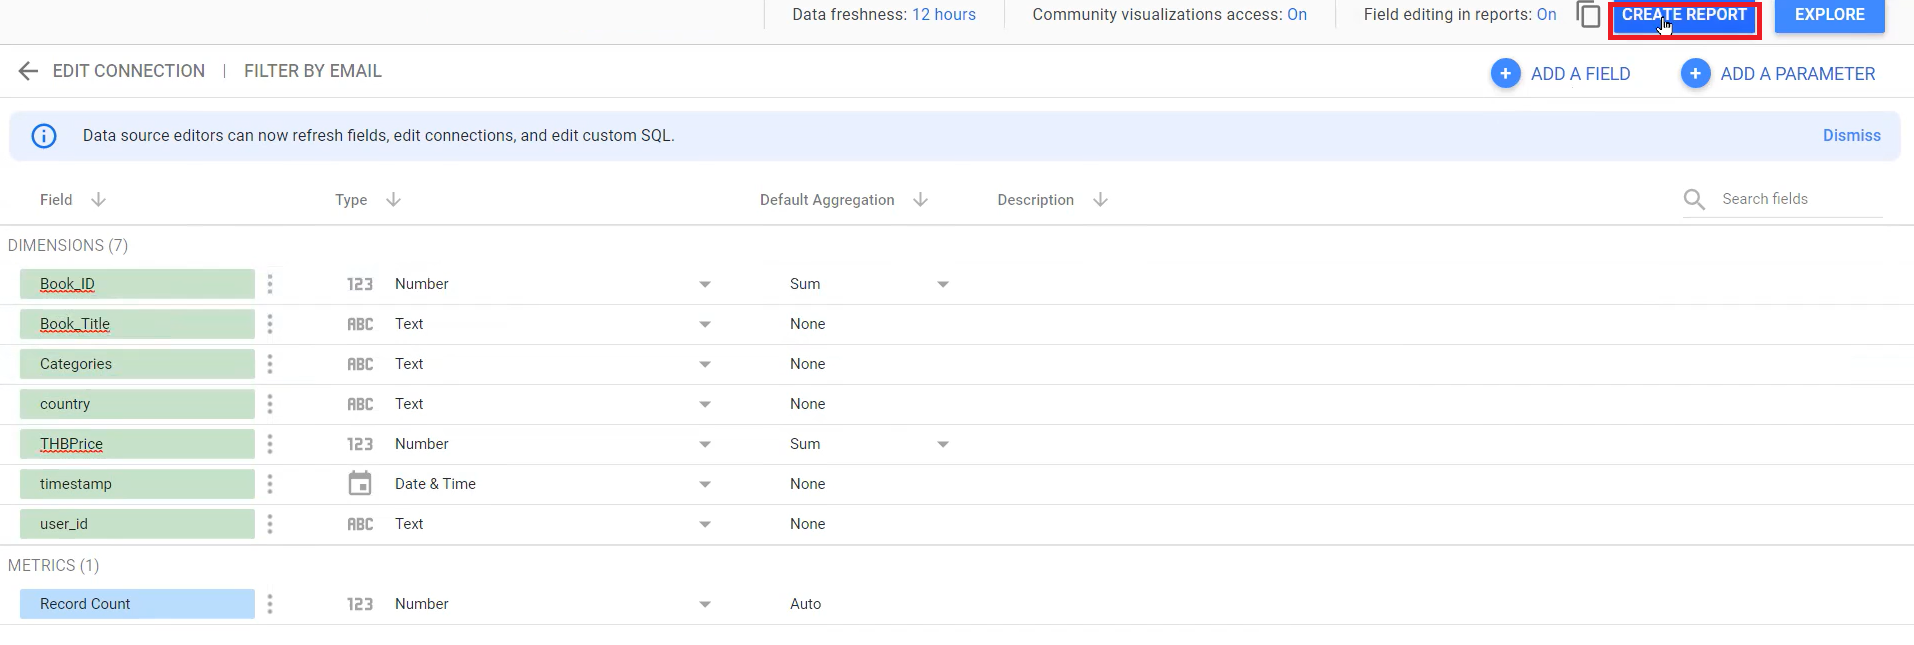

### Dashboard 1: Overview

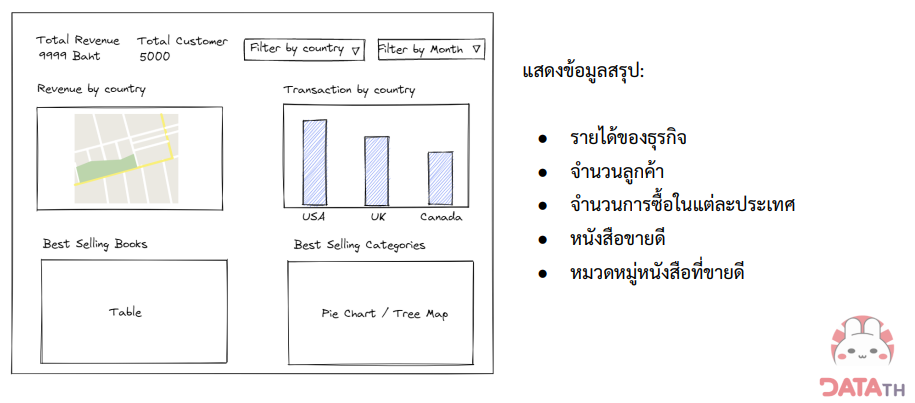

#### 1. Total Revenue
* เลือกเมนู Add a chart > Scorecard
 * นำค่า THBPrice มาใส่ใน Metric , Aggregation = sum , type = currency (THB)

#### 2. Total Customer
* เลือกเมนู Add a chart > Scorecard
 * นำค่า user_id มาใส่ใน Metric , Aggregation = count distinct

#### 3. Filter by country
* เลือกเมนู Add a control > Dowp-down list
 * นำค่า country มาใส่ใน contron field

#### 4. Filter by Mounth
* เลือกเมนู Add a control > Dowp-down list
 * นำค่า timestemp มาใส่ใน contron field , type = date & time(year month)

#### 5. Revenue by country
* เลือกเมนู Add a chart > google map
 * นำค่า country มาใส่ใน location
 * นำค่า THBPrice มาใส่ใน size , Aggregation = sum

#### 6. Transaction by country
* เลือกเมนู Add a chart > bar
 * นำค่า country มาใส่ใน Dimension
 * นำค่า Recode Count มาใส่ใน Metric

#### 7. Best Selling Books
* เลือกเมนู Add a chart > table
 * นำค่า Book_Title มาใส่ใน Dimension
 * นำค่า THBPrice มาใส่ใน Metric , Aggregation = sum

#### 8. Best Selling Categories
* เลือกเมนู Add a chart > treemep
 * นำค่า Categories มาใส่ใน Dimension
 * นำค่า THBPrice มาใส่ใน Metric , Aggregation = sum

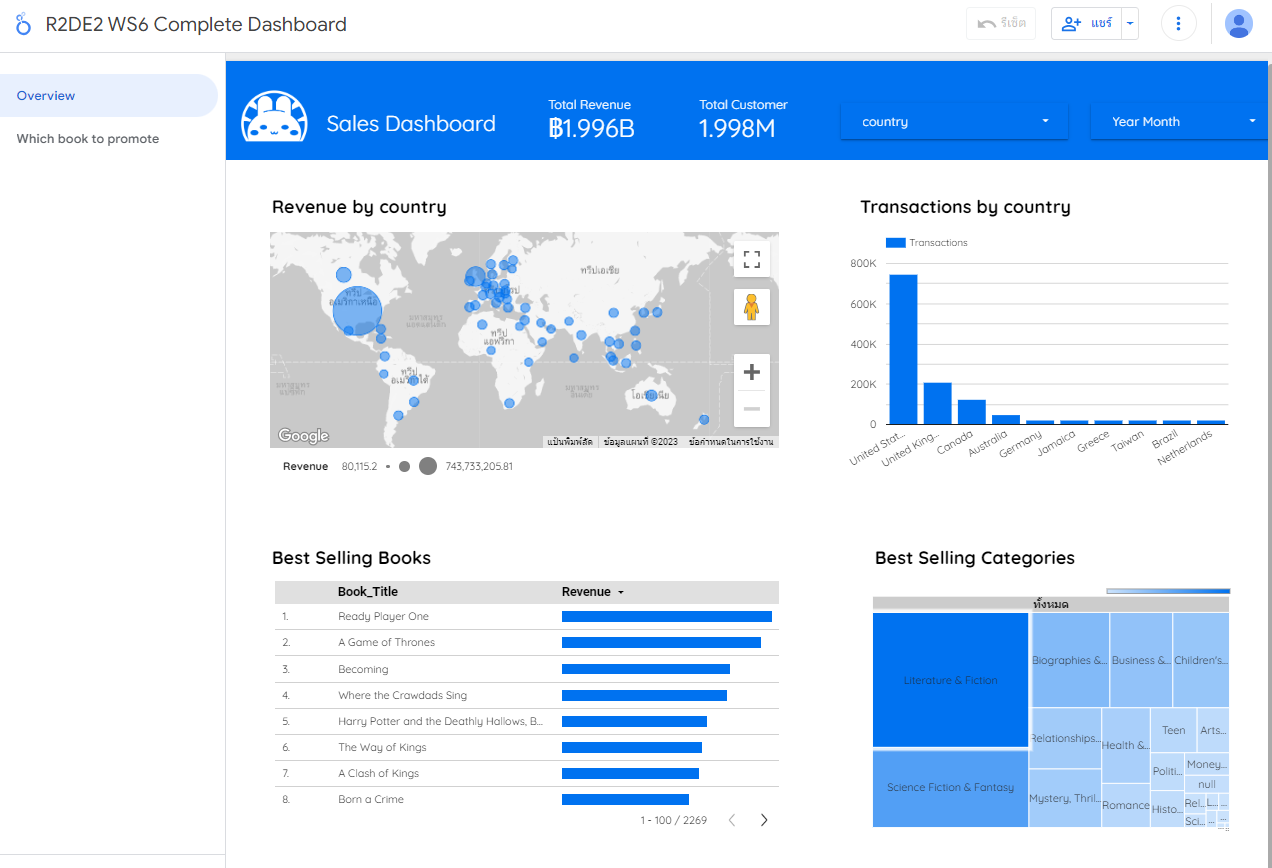

### Dashboard 2: Search book by revenue

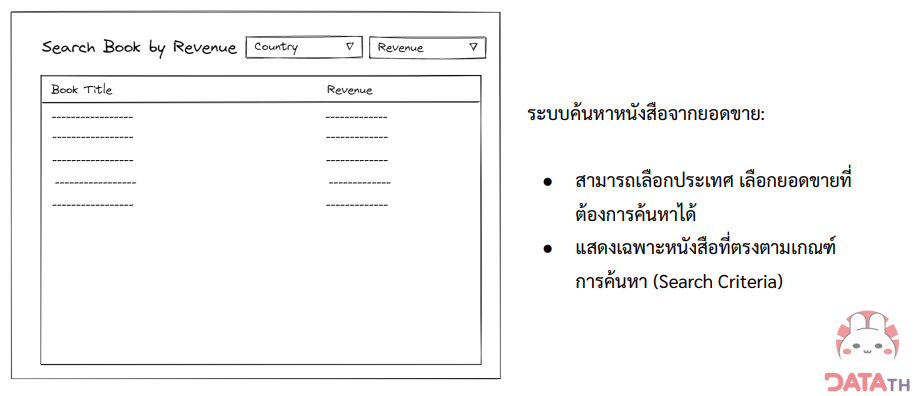

#### Min Revenue
* สร้างระบบค้นหาใน Looker Studio

##### Step 1 สร้าง Parameter
* เลือกเมนู ADD A PARAMETER

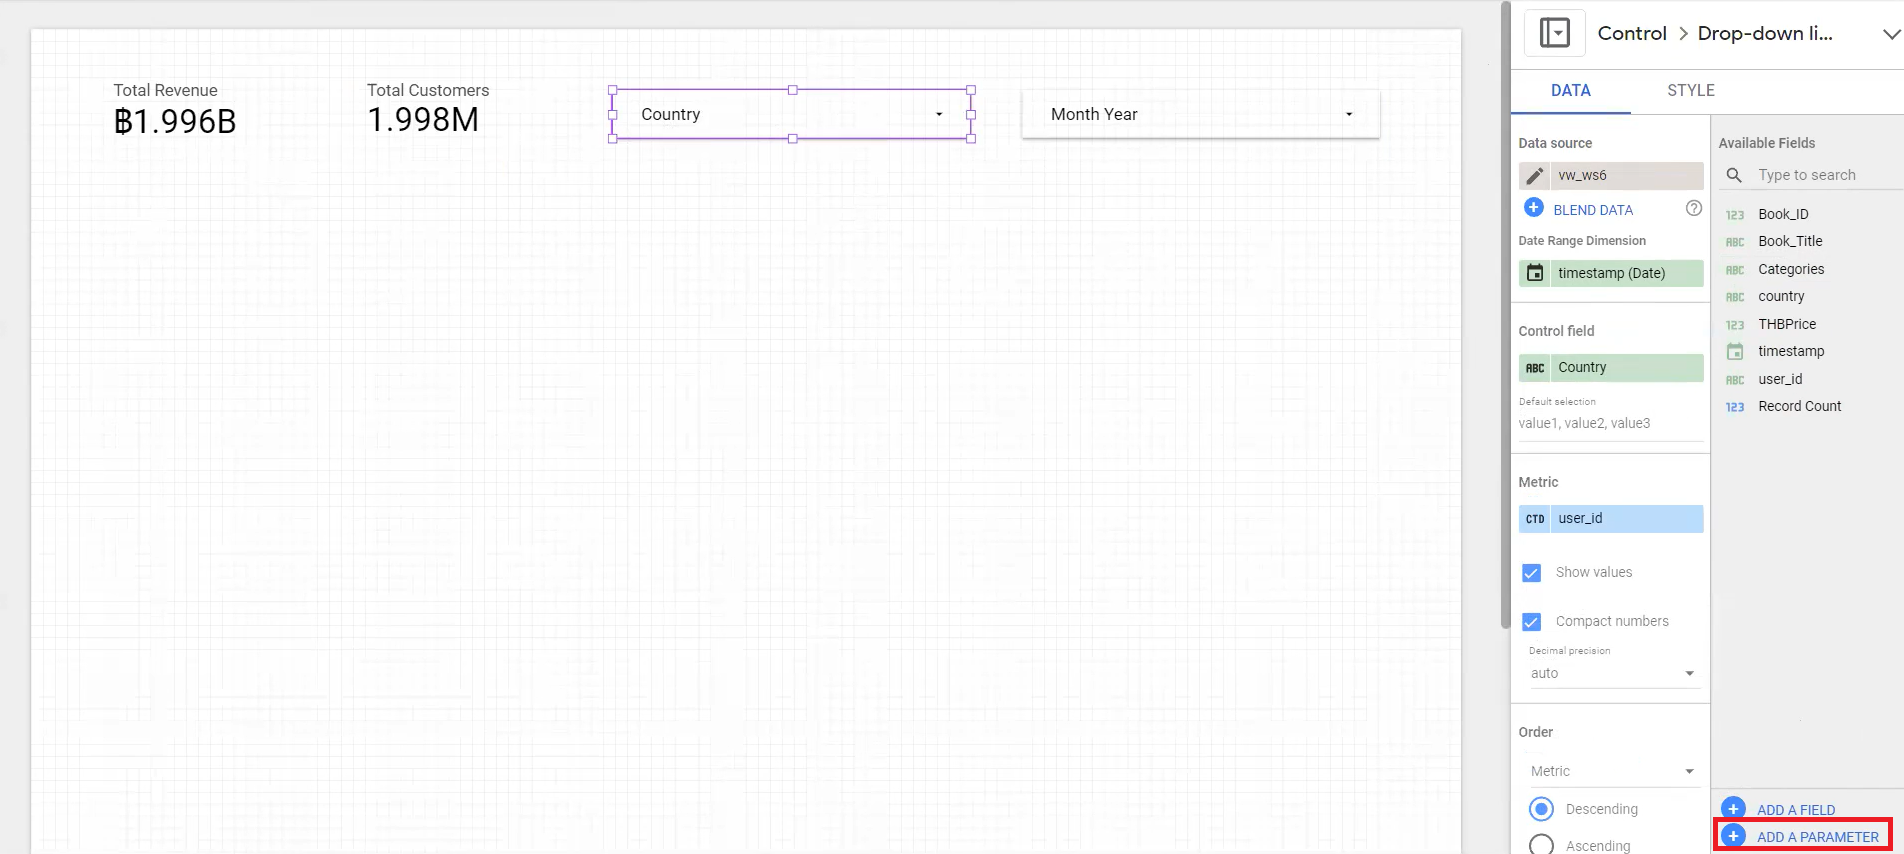

* Parameter name = Min_Revenue
* Parameter ID = min_revenue
* Data type = Number(whole)
* Permitted values = Range
* Range = (min = 0) , (max = 30000000)

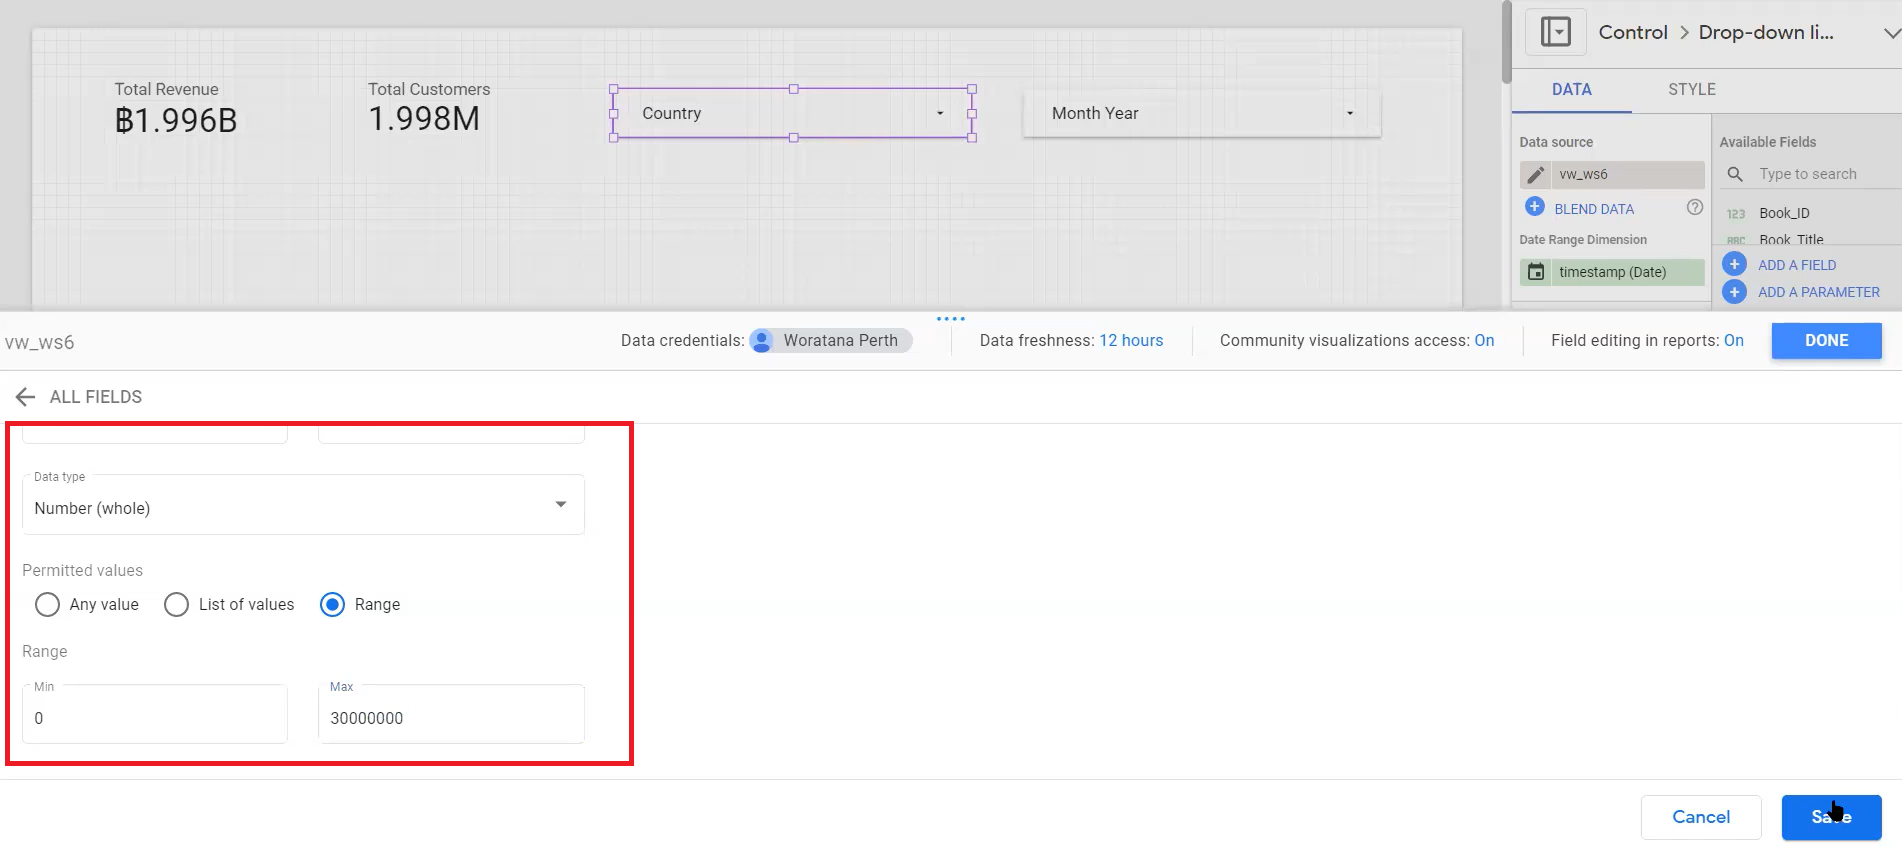

* ได้ Parameter Min_Revenue

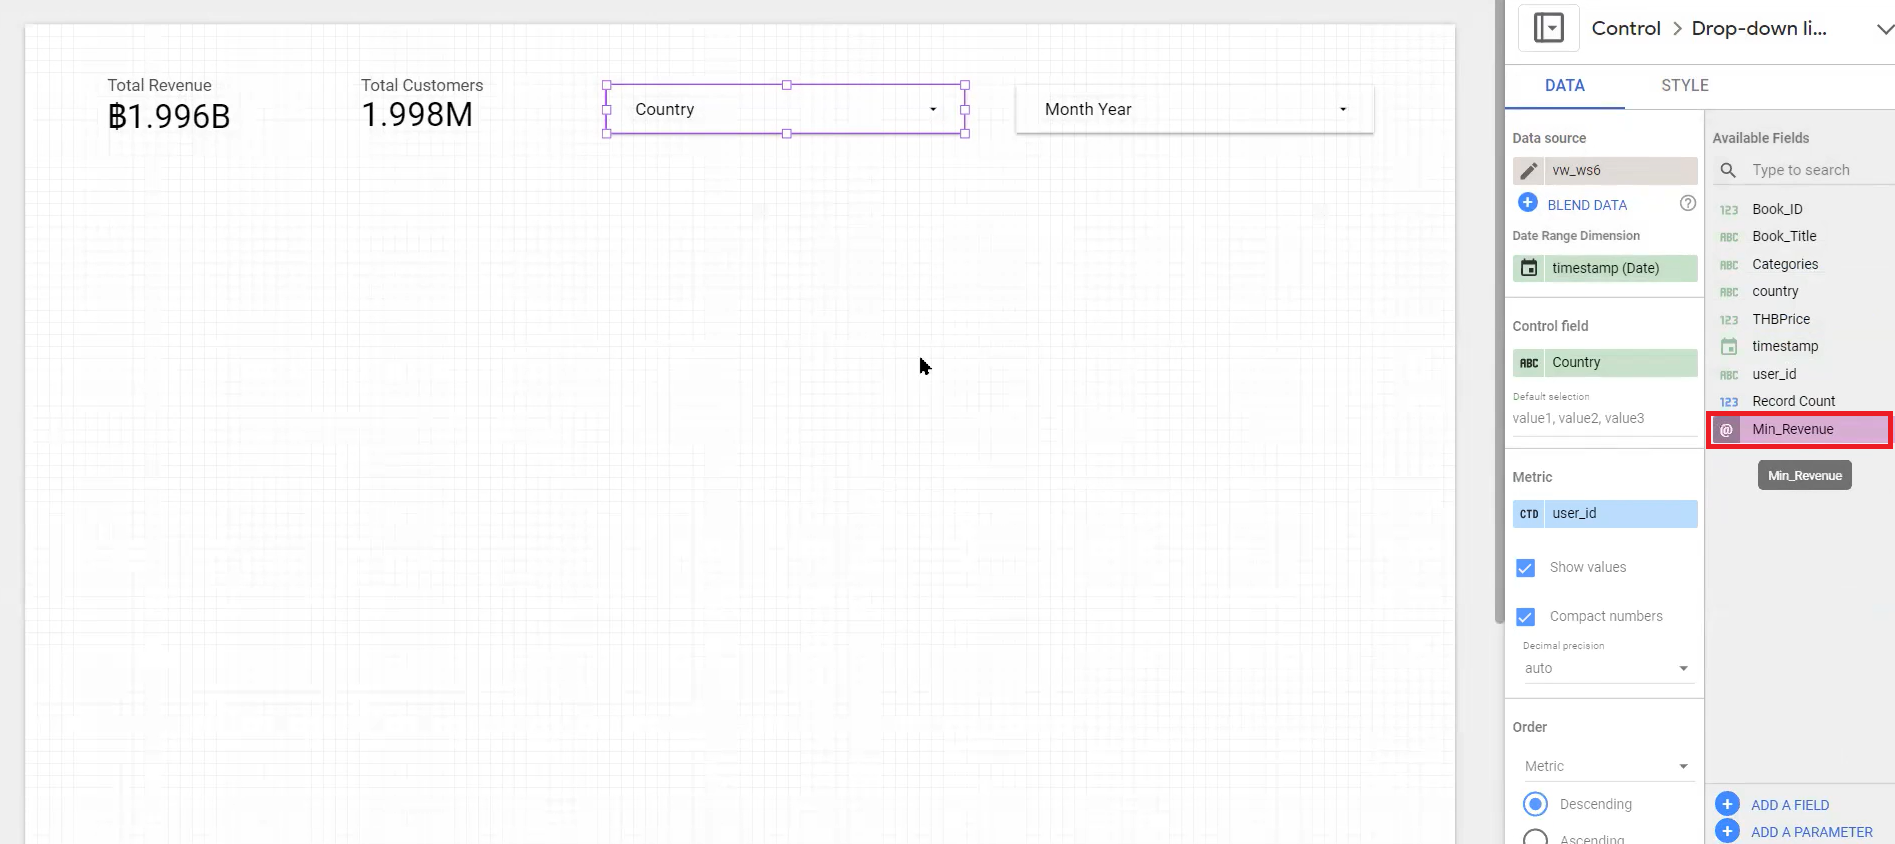

* เลือกเมนู Add a control > Slider
 * นำค่า Min_Revenue มาใส่ใน control field

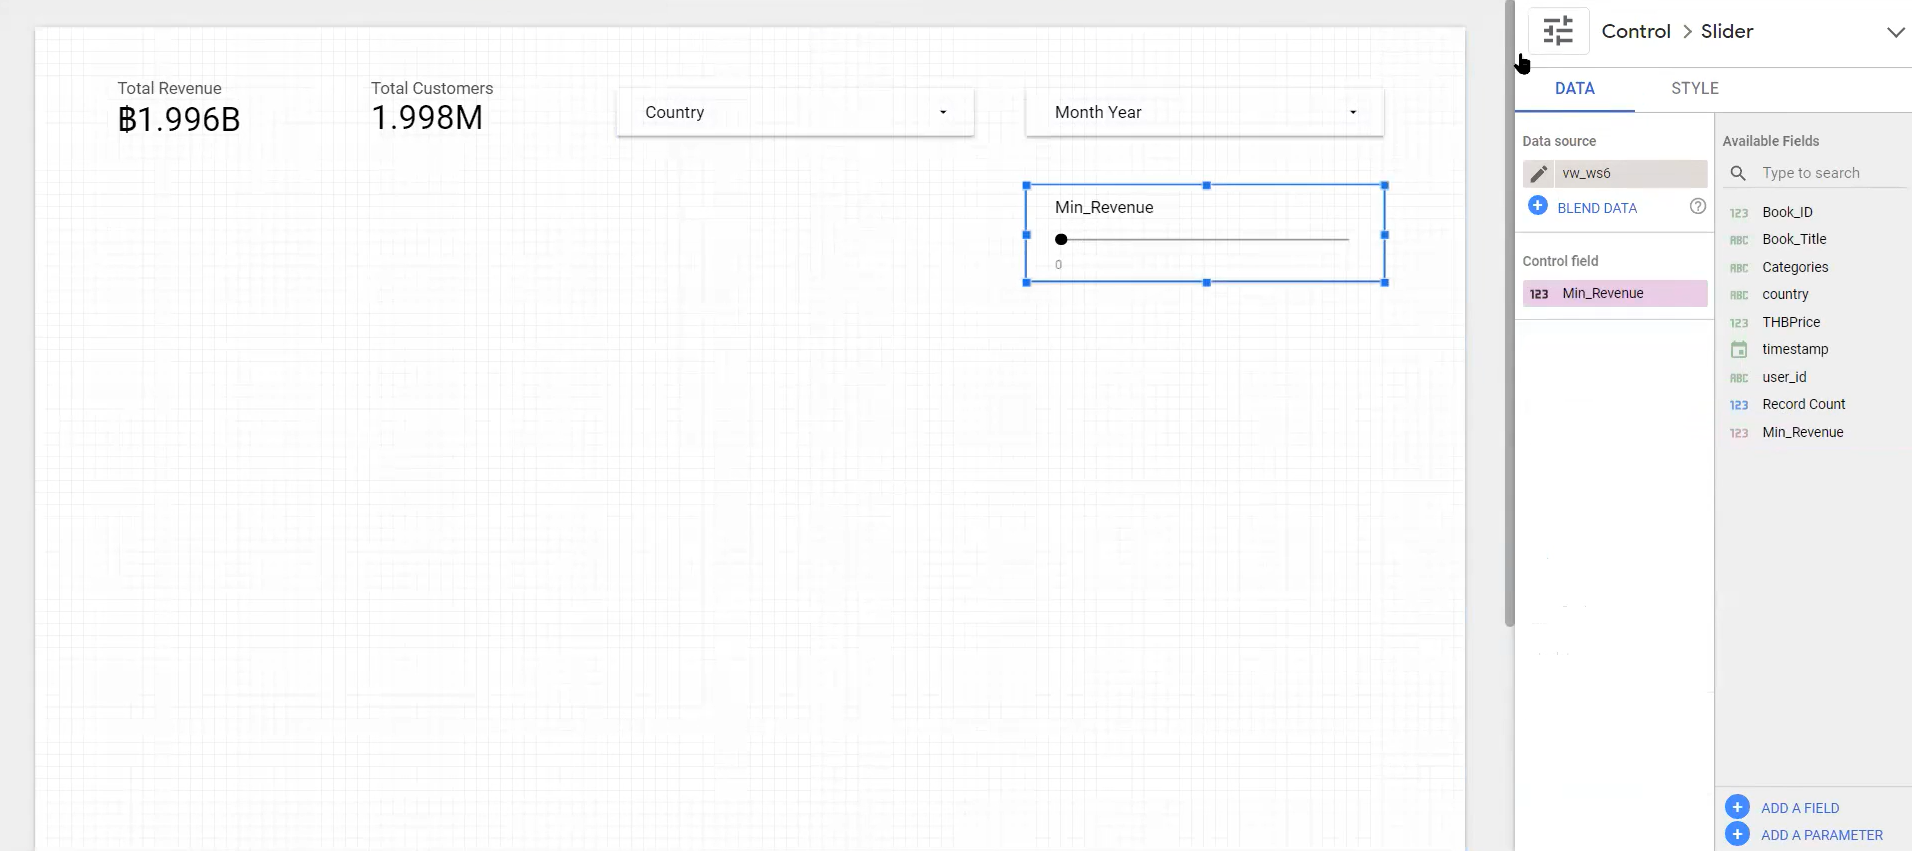

##### Step 2 สร้าง Calculated Field
* เลือกเมนู ADD A FIELD

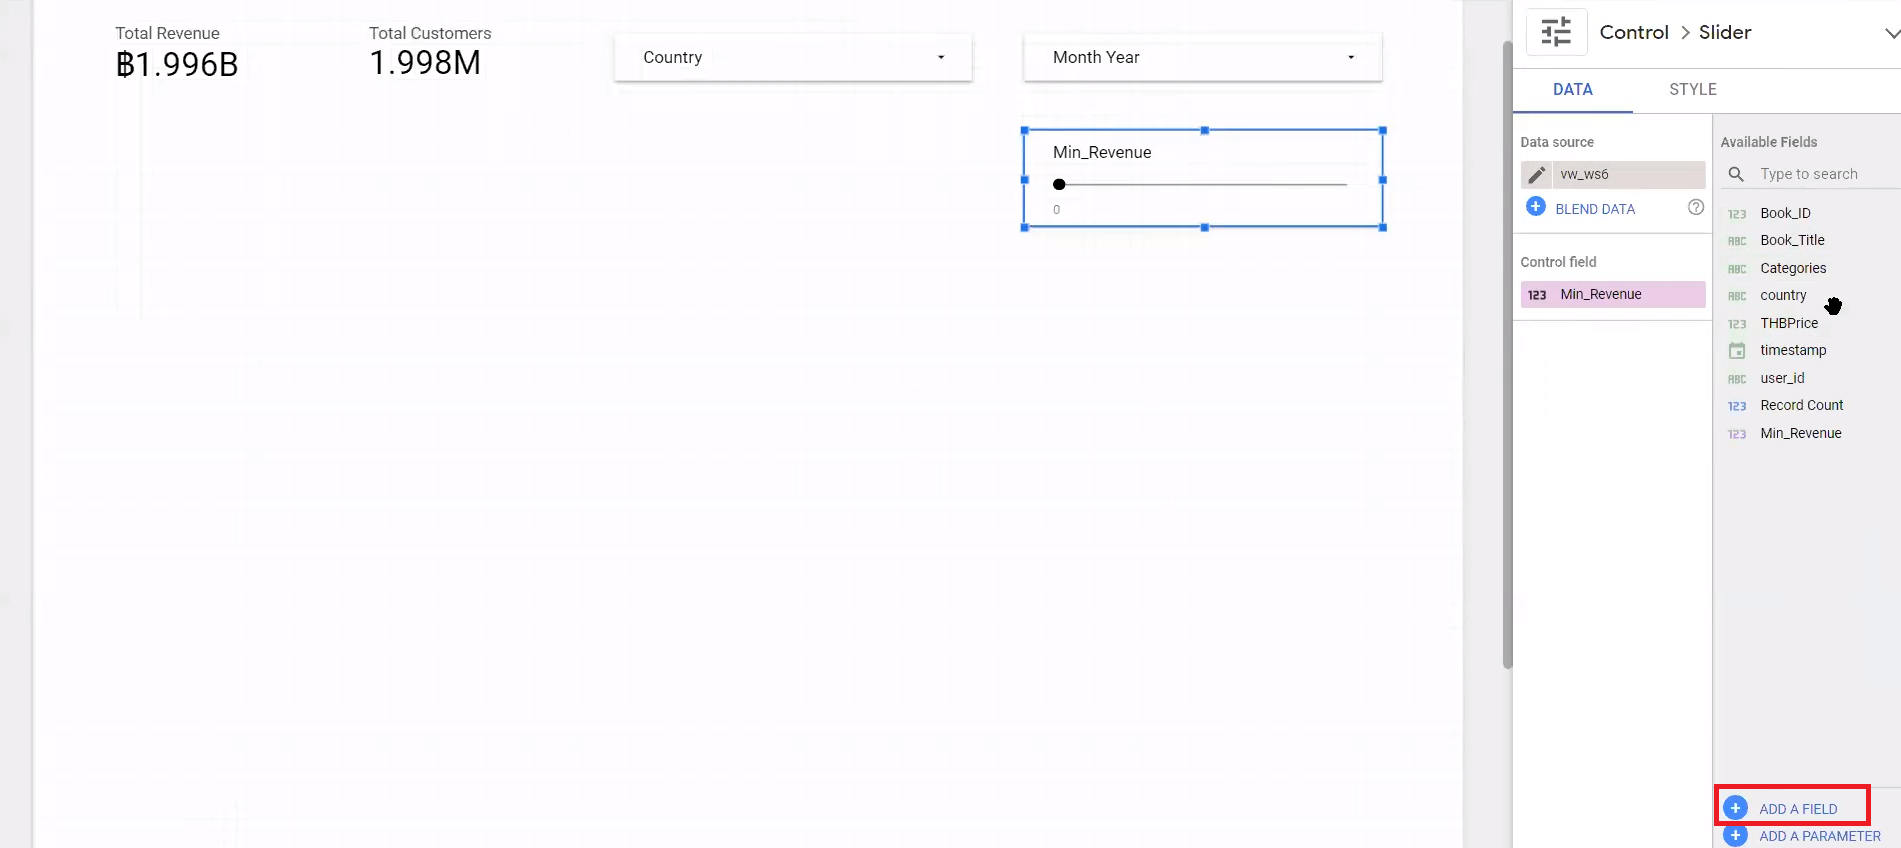

* Fleid Name = More_than_min_rev
* Formula = `CASE WHEN SUM(THBPrice) > Min_Revenue THEN 1 ELSE 0 END`

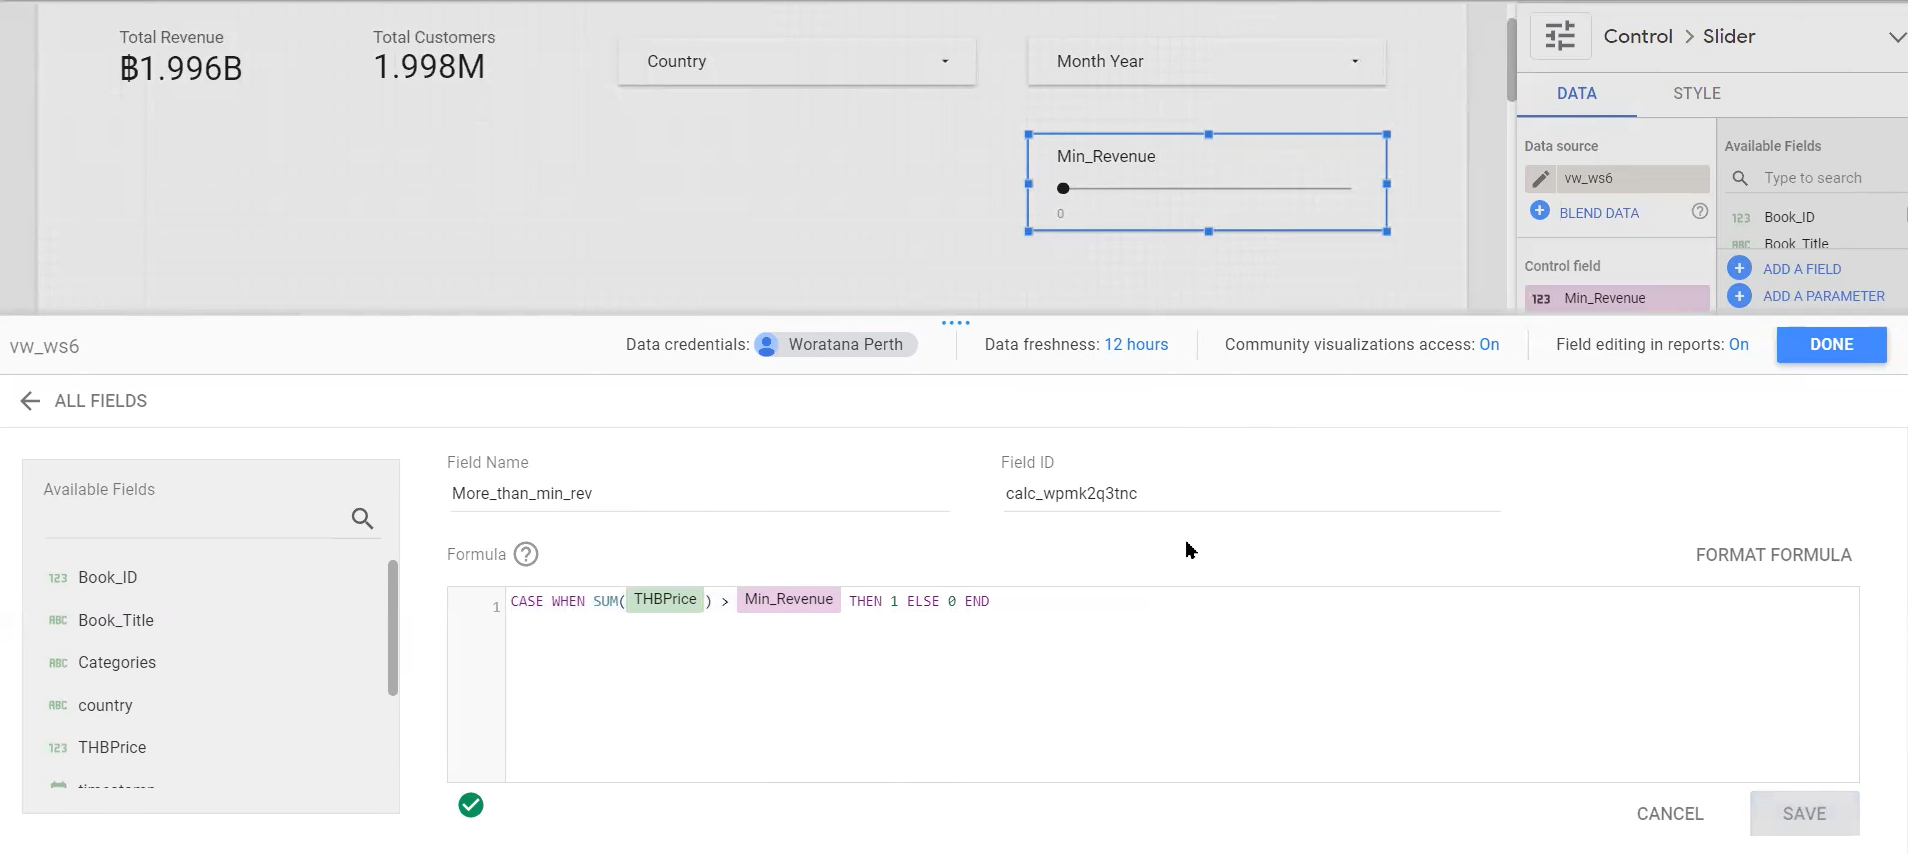

* ได้ Calculated Field More_than_min_rev

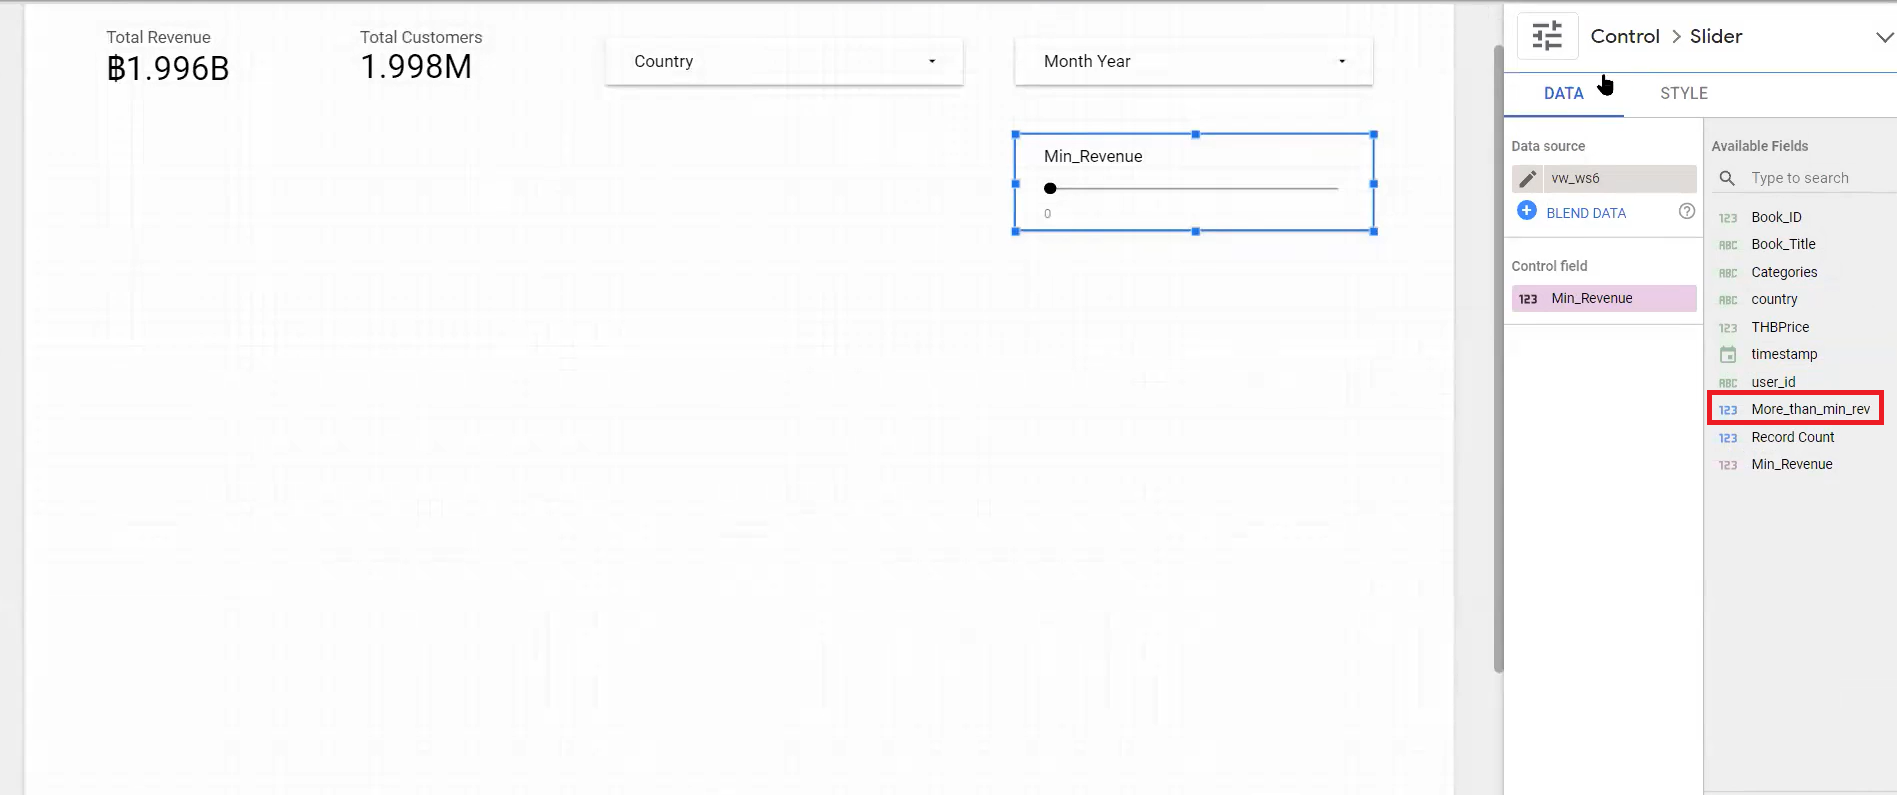

##### Step 3 เพิ่ม Filter
* เลือกเมนู Add a chart > table
 * นำค่า Book_Title มาใส่ใน Dimension
 * นำค่า THBPrice มาใส่ใน Metric , Aggregation = sum
 * เลือกเมนู ADD A FILTER

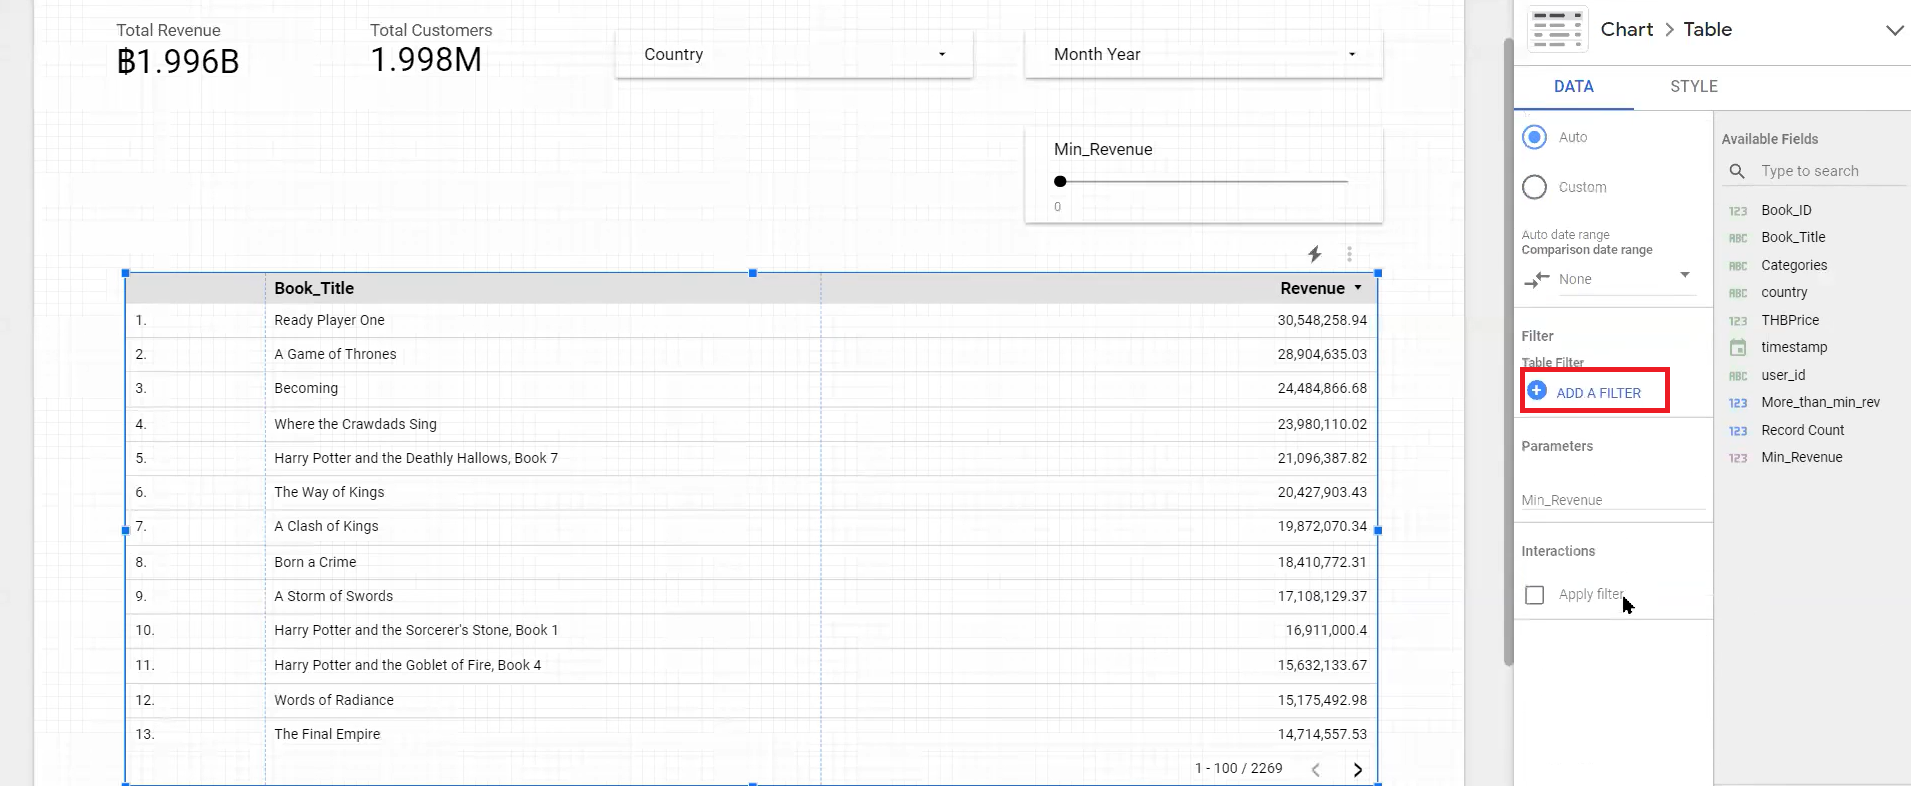

* Name = rev_filter
* Include More_than_min_rev Equal to (=) 1

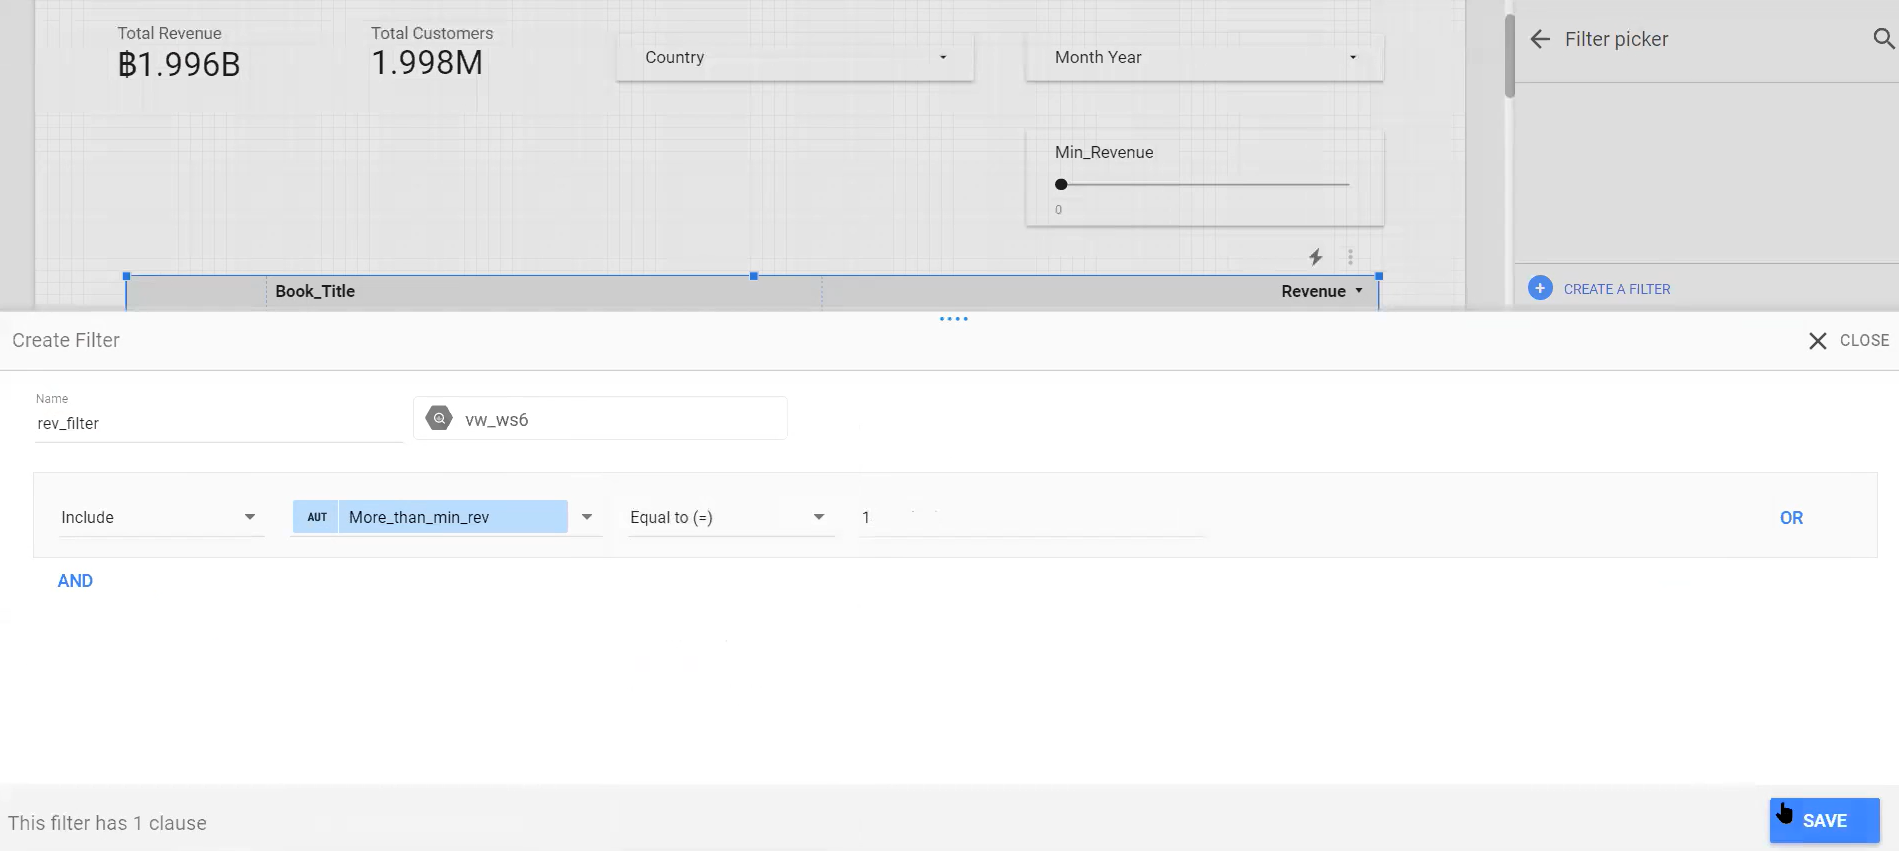

* สร้างระบบค้นหาหนังสือจากยอดขายได้สำเร็จ

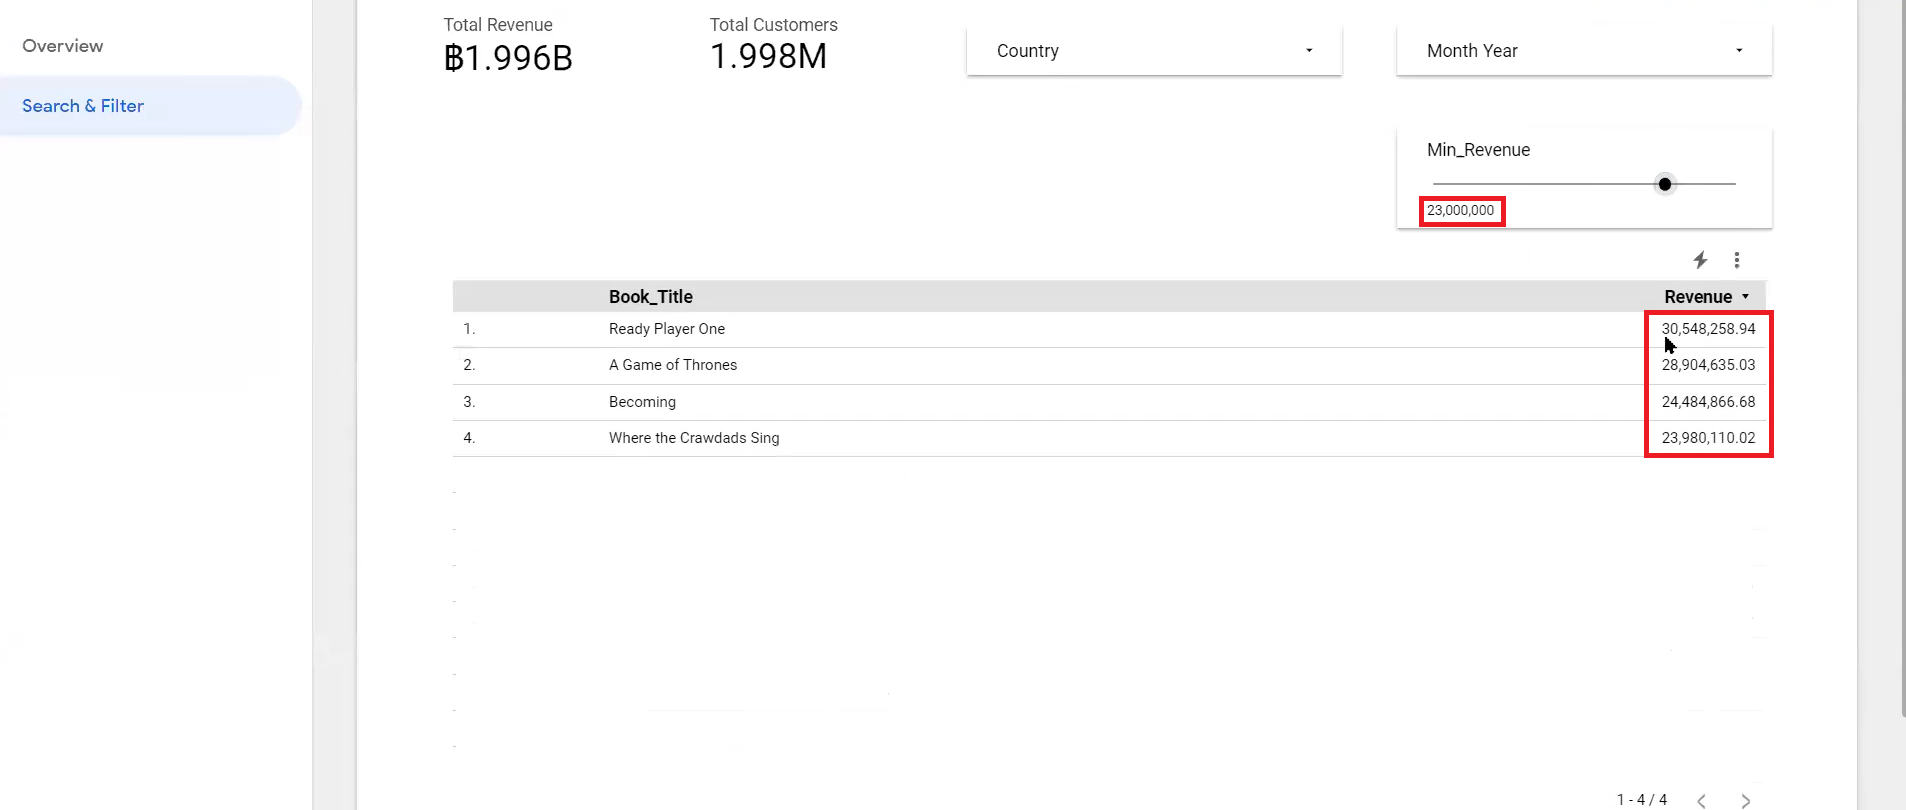

* ตกแต่ง Dashboard ให้สวยงามและเสร็จสิ้น

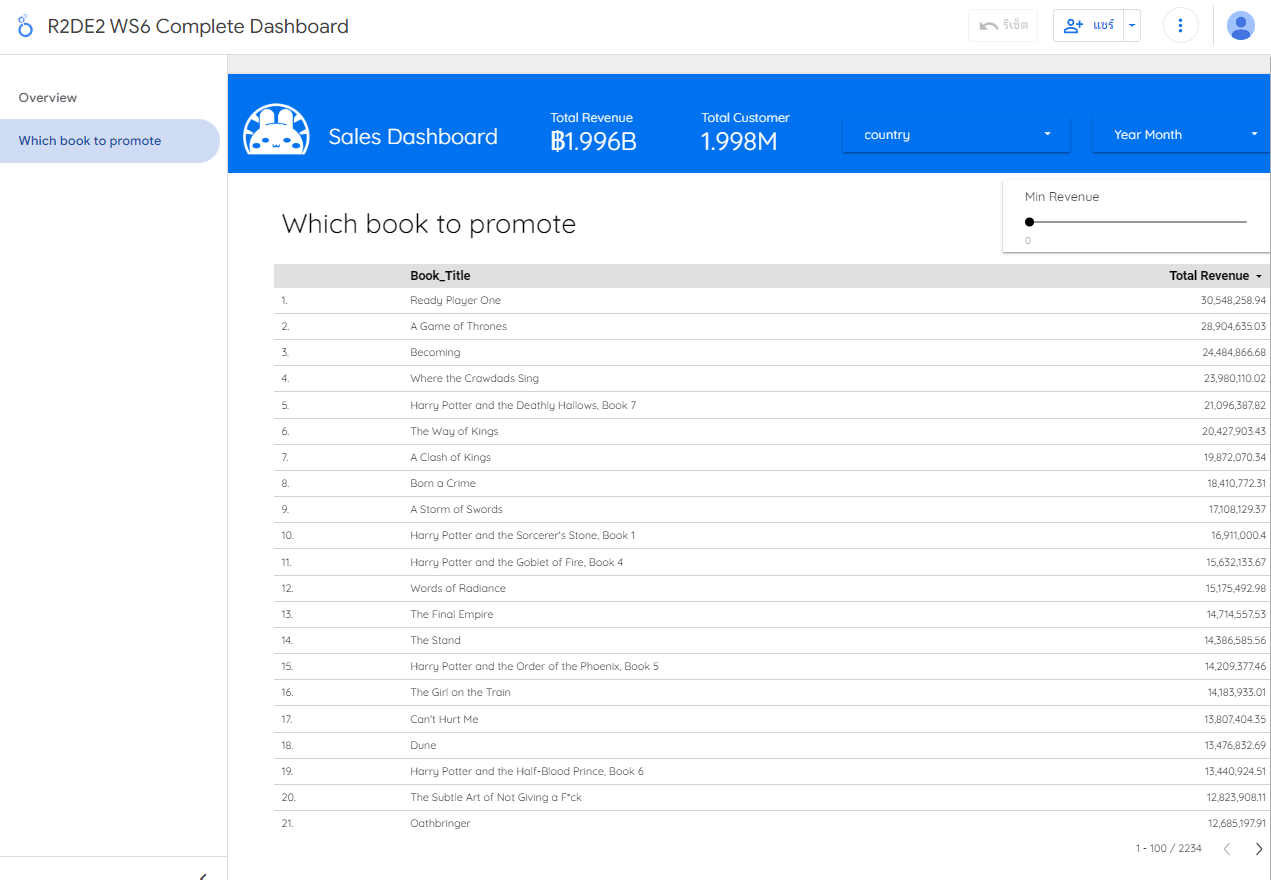